<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Алексей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Комментарий:</strong></p>
<!--     <p class="mb-0"><strong>Исправление:</strong></p> -->
    <p class="mb-0">Дмитрий, здравствуй, спасибо за проверку 💡</p>
</div>

# Учебный Проект → «Чётенькое такси» 🚖

> Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.  
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

<hr>

Импортируем библиотеки 🎒

In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import RandomState

from matplotlib import rcParams
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor

from scipy.sparse import hstack

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

Настроим вид графиков по+красоте ✨

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
            }

In [4]:
# set max columns to none
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

Константы.

In [5]:
RANDOM_SEED = 108108108
RANDOM_NP = RandomState(128)
HOURS_IN_WEEK = 24 * 7

Функции.

<hr>

## Загрузим данные

In [61]:
try:
    taxi_df = pd.read_csv(
        './datasets/taxi.csv',
        index_col=[0],
        parse_dates=[0]
    )
    
except FileNotFoundError:
    taxi_df = pd.read_csv(
        'https://code.s3.yandex.net/datasets/taxi.csv',
        index_col=[0],
        parse_dates=[0]
    )
    print('FYI datasets loaded via url')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 

Здесь все супер и код почти всегда будет отрабатывать корректно за счет облачного пути. Однако путь в первой "ветке" слишком  загадочный. Очень похож на путь внутри практикума, но почему-то относительный (точка в начале - это текущая директория).
</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Комментарий:</strong></p>
<!--     <p class="mb-0"><strong>Исправление:</strong></p> -->
    <p class="mb-0">Проекты делаю в лоальном <code>Jupyter</code>, практикумовский непрактичный: зависает и бывает недоступен. Локальный и работает быстрее 👌</p>
</div>

In [62]:
taxi_df.sort_index(inplace=True)

In [8]:
display(taxi_df)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [9]:
display(
    taxi_df.info(),
    taxi_df.describe()
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


### Ресемплируем по одному часу

In [63]:
taxi_df_re = taxi_df.resample('1H').sum()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

In [11]:
display(taxi_df_re.head())

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [12]:
display(
    taxi_df_re.info(),
    taxi_df_re.describe()
)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


None

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


<hr>

## Проанализируем данные

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Прошу тебя прежде чем выполнять декомпозицию ряда построить график исходного ряда и оценить его визуально. Можно дополнительно на ложить сколзящее среднее за сутки / неделю.</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p class="mb-0">Посмотрел на сырые данные добавил <code>rolling</code> на день, на 7 дней, построил графики.</p>
</div>

In [13]:
ten_min_in_hour = 60 / 10
ten_min_in_day = int(ten_min_in_hour * 24)
ten_min_in_week = int(ten_min_in_day * 7)

print('десятиминуток в сутках', ten_min_in_day)
print('десятиминуток в неделе', ten_min_in_week)

десятиминуток в сутках 144
десятиминуток в неделе 1008


In [64]:
taxi_df['rolling_mean_day'] = taxi_df['num_orders'].rolling(
        window='D',
        min_periods=ten_min_in_day
    ).mean()

In [65]:
taxi_df['rolling_mean_week'] = taxi_df['num_orders'].rolling(
        window='7D',
        min_periods=ten_min_in_week
    ).mean()

<Figure size 2160x1200 with 0 Axes>

<Figure size 2160x1200 with 0 Axes>

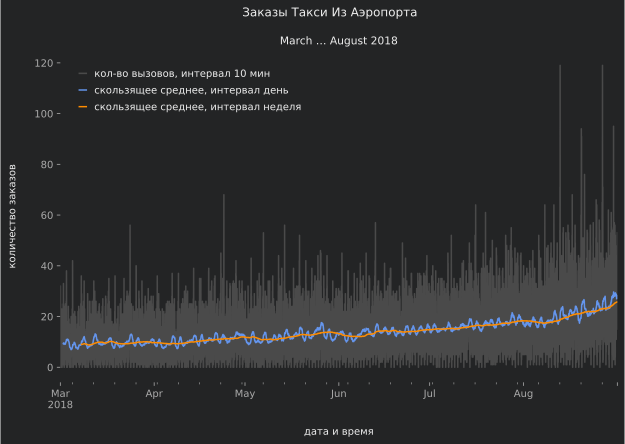

In [68]:
cmap = mpl.cm.get_cmap('Greys')
with mpl.rc_context(custom_params):
    plt.figure(figsize=(9, 5))
    taxi_df.plot(color=[cmap(0.77), 'cornflowerblue', 'darkorange'])
    plt.suptitle('Заказы Такси Из Аэропорта')
    plt.title(
        '{start} … {end} {year}'.format(
            start=taxi_df.index.min().strftime('%B'),
            end=taxi_df.index.max().strftime('%B'),
            year=taxi_df.index.max().strftime('%Y'),
        ),
        fontsize=10.7,
    )
    plt.xlabel('дата и время')
    plt.ylabel('количество заказов')
    plt.legend(['кол-во вызовов, интервал 10 мин', 'скользящее среднее, интервал день', 'скользящее среднее, интервал неделя'])
    plt.show()

По графику необработанного набора данных заметно тренд на поышение заказов к сентябрю.  
По графику суточного скользящего среднего видны колебания количества заказов.  
По графику недельного скользящего среднего виден тренд на поышение количества заказов, заметны слабые колебания.

Посмотрим на сезонность в неделях и месяцах:

In [17]:
decomposed_week = seasonal_decompose(
        taxi_df['num_orders'].resample('D').sum()
    )

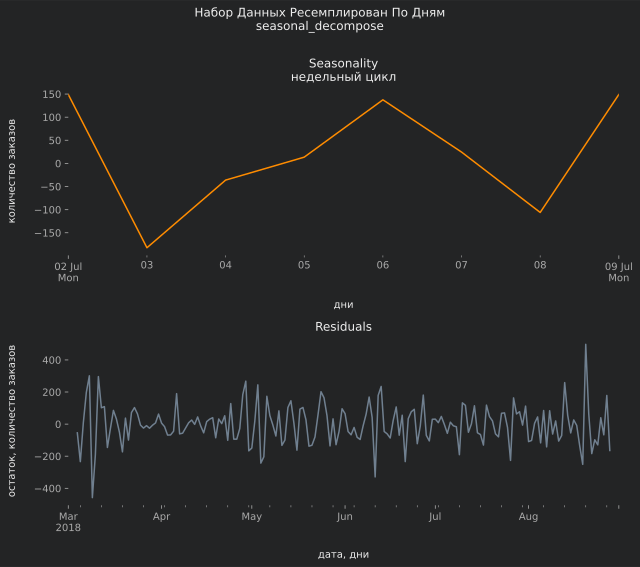

In [18]:
with mpl.rc_context(custom_params):
    plt.figure(figsize=(9, 8))
    plt.suptitle('Набор Данных Ресемплирован По Дням\nseasonal_decompose\n')
    
    plt.subplot(211)
    decomposed_week.seasonal['2018-07-02': '2018-07-09'].plot(ax=plt.gca(), color='darkorange')
    plt.subplot(211).xaxis.set_major_formatter( mdates.DateFormatter('%d %b\n%a'))
    plt.title('Seasonality\nнедельный цикл')
    plt.xlabel('дни')
    plt.ylabel('количество заказов')

    plt.subplot(212)
    decomposed_week.resid.plot(ax=plt.gca(), color='slategrey')
    plt.title('Residuals')
    plt.xlabel('дата, дни')
    plt.ylabel('остаток, количество заказов')
    
    plt.tight_layout()
    plt.show()

Понедельник и Пятница самые популярные дни для вызова такси в аэропорт)  
А во Вторник и Воскресенье реже вызывают..

ValueError: x must have 2 complete cycles requires 104 observations. x only has 27 observation(s)

Жаль, периодичность за месяц не выявить, маловато данных..

Посмотрим на данные ресемплированные по часам.

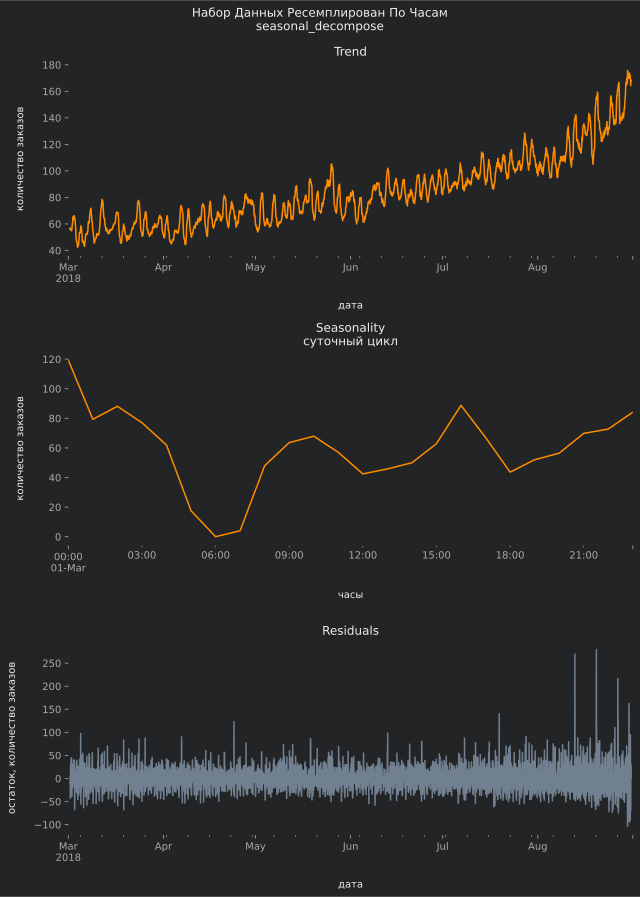

In [19]:
decomposed = seasonal_decompose(taxi_df_re)

with mpl.rc_context(custom_params):
    plt.figure(figsize=(9, 16))
    plt.suptitle('Набор Данных Ресемплирован По Часам\nseasonal_decompose\n')
    
    plt.subplot(411)
    decomposed.trend.plot(ax=plt.gca(), color='darkorange')
    plt.title('Trend')
    plt.xlabel('дата')
    plt.ylabel('количество заказов')
    
    plt.subplot(412)
    (decomposed.seasonal['2018-03-01']
         + abs(decomposed.seasonal.min())
    ).plot(ax=plt.gca(), color='darkorange')
    plt.title('Seasonality\nсуточный цикл')
    plt.xlabel('часы')
    plt.ylabel('количество заказов')

    plt.subplot(413)
    decomposed.resid.plot(ax=plt.gca(), color='slategrey')
    plt.title('Residuals')
    plt.xlabel('дата')
    plt.ylabel('остаток, количество заказов')

    plt.tight_layout()
    plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть декомпозиция на тренд и сезонность. Очень информативный тренд и суточная сезонность. Однако для человека, незнакомого с проектом лучше как-то пояснить, что сезонность выведена за сутки.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Комментарий:</strong></p>
<!--     <p class="mb-0"><strong>Исправление:</strong></p> -->
    <p class="mb-0">Спасибо, недельный цикл нашел)</p>
</div>

In [20]:
print(
    'Количество часов без вызова:',
    len(taxi_df_re.loc[taxi_df_re['num_orders'] == 0].index)
)

Количество часов без вызова: 1


Данных всего за 6 месяцев.  
Был один час когда такси не заказывали, а бывает и густо - 462 вызова за час.  
`seasonal_decompose` выявил тренд увеличения заказов к сентябрю.
`seasonal_decompose` выявил в сутках закономерность: пик вызовов в 00 часов и минимум в 6 утра.  
Похоже на правду..

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<hr>

## Обучим разные модели с различными гиперпараметрами

In [21]:
taxi_df.drop(
    columns=['rolling_mean_day', 'rolling_mean_week'],
    inplace=True,
)

### Создадим дополнительные признаки

In [22]:
def make_features(data, max_lag, window_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(
            window=window_size,
            closed='left',
        ).mean()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь час, у нас четкая сезонность внутри суток.
Также очень полезный признак день недели, в данных есть недельная сезонность.
        
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Молодец, что используешь все три типа признаков    
    
</div>

In [23]:
def create_train_test(data_df_re):
    train, test = train_test_split(data_df_re, shuffle=False, test_size=0.1)
    train = train.dropna()

    features_train = train.drop(columns='num_orders')
    target_train = train['num_orders']

    features_test = test.drop(columns='num_orders')
    target_test = test['num_orders']
    
    return (features_train, target_train, features_test, target_test)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Корректное разбиение, данные не перемешиваются. </div>

In [24]:
taxi_df_re = taxi_df.resample('1H').sum()

In [25]:
make_features(
    data=taxi_df_re,
    max_lag=24,
    window_size=HOURS_IN_WEEK
)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты вправе использовать любые гиперпараметры  max_lag, window_size, приводящие к результату. Но лучше использовать резульаты анализа. Что мы знаем? В данных есть суточная и недельная сезонности. В данных есть тренд. Таким образом, скользящее среднее может быть тем признаком, на который модель может опираться как на тренд. Но лучше если оно будет максимально "ровным", не подверженным суточным и недельным колебаниям. И в этом нам поможет использование размера окна равным 24 или 168.
    
Аналогично с отстающими значениями. В авторегрессионных моделях строится модель, которая пытается по предыдущим значениям построить текущее (найти закономерность). И при выборе окна обычно исползьуется периоды сезонности. Поэтому количество отстающих значений тоже есть смысл брать или кратным суткам (можно за несколько суток) или сразу равным неделе.    

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <ul>
        <li><code>max_lag=24</code> сутки</li>
        <li><code>window_size=168</code> неделя</li>
    </ul>
</div>

### Создадим тестовую выборку

> Сделайте тестовую выборку размером размером 10% от исходных данных.

In [26]:
features_train, target_train, features_test, target_test = create_train_test(
        taxi_df_re
    )

In [27]:
cat_col = [
        'dayofweek',
        'hour',
    ]

<hr>

### Обучим LinearRegression

Подготовим OHE.

In [37]:
ohe_to_lin_reg = OneHotEncoder(drop='first')

ohe_to_lin_reg.fit(features_train.loc[: , cat_col])

OneHotEncoder(drop='first')

In [39]:
def ohe_transform(ohe_encoder=ohe_to_lin_reg, features_set=features_train, cat_col=cat_col):
    return_train_lin_reg = ohe_encoder.transform(features_set.loc[: , cat_col])

    return_train_lin_reg = hstack(
            (
                features_set.loc[: ,
                    (features_set.columns != cat_col[0])
                    & (features_set.columns != cat_col[1])
                ].values, 
                return_train_lin_reg
            )
        )
    return return_train_lin_reg

In [40]:
features_train_lin_reg = ohe_transform(features_set=features_train)
features_test_lin_reg = ohe_transform(features_set=features_test)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Идея с рассмотрением признаков как категориальных и как следствие one-hot кодирование шикарная! Но мы строим ML модели, поэтому давай оставим get_dummies для анализа. А для ML экспериментов будет испльзовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. И соответственно обучать его на обучающих данных и применять к остальным.
    
    
Да, я понимаю, что врядли в данных появится 8 день недели или 25 час, но правильные привычки лучше формировать сразу.

</div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <ul>
        <li><code>max_lag=24</code> сутки</li>
        <li><code>window_size=168</code> неделя</li>
    </ul>
</div>

In [42]:
tscv = TimeSeriesSplit(n_splits=5)

In [43]:
model = LinearRegression()

In [44]:
lin_reg_param_cv = {
        'fit_intercept': [True, False]
    }

In [45]:
gsearch_lin_reg = GridSearchCV(
        estimator=model,
        scoring='neg_root_mean_squared_error',
        param_grid=lin_reg_param_cv,
        n_jobs=-1,
        cv=tscv
    )

gsearch_lin_reg.fit(
    features_train_lin_reg,
    target_train,
)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_root_mean_squared_error')

In [47]:
gsearch_lin_reg.best_score_

-24.702659186188246

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Очень хорошо, что для оценки модели ты используешь кросс-валидацию. И дважды молодец,что используешь правильную метрику.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Но при работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

    tscv = TimeSeriesSplit(n_splits=5)
    gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
    gsearch.fit(X, y)

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p>Внедрил <code>TimeSeriesSplit(n_splits=5)</code> в <code>GridSearchCV</code></p>
    </ul>
</div>

<hr>

### Обучим CatBoostRegressor

In [50]:
taxi_df_re = taxi_df.resample('1H').sum()

In [51]:
make_features(
    data=taxi_df_re,
    max_lag=24,
    window_size=HOURS_IN_WEEK
)

In [52]:
features_train, target_train, features_test, target_test = create_train_test(
        taxi_df_re
    )

In [53]:
cat_model = CatBoostRegressor(
        objective='RMSE',
        cat_features=cat_col,
        verbose=False,
    # **after_grid
    )

In [54]:
cat_params_gs = {
        'num_trees': [750,],
        'learning_rate': [0.03, 0.1],
        'depth': [3, 7],
        'l2_leaf_reg': [3, 5, 7],
        'grow_policy': ['SymmetricTree', 'Depthwise']
    }

`GridSearchCV` отрабатывает 1,5 часа, поэтому перевёл в `raw` чтобы не ждать..

In [55]:
cat_model_cv = GridSearchCV(
        estimator=cat_model,
        param_grid=cat_params_gs,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
    )

CPU times: user 21 µs, sys: 3 µs, total: 24 µs
Wall time: 27.7 µs


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже проблема с утечками при кросс-валидации</div>


<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p>Внедрил <code>TimeSeriesSplit(n_splits=5)</code> в <code>GridSearchCV</code></p>
    </ul>
</div>

In [56]:
%%time

cat_model_cv.fit(
    features_train,
    target_train,
)

CPU times: user 29.9 s, sys: 2.92 s, total: 32.8 s
Wall time: 20min 27s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7ff959a19840>,
             n_jobs=-1,
             param_grid={'depth': [3, 7],
                         'grow_policy': ['SymmetricTree', 'Depthwise'],
                         'l2_leaf_reg': [3, 5, 7], 'learning_rate': [0.03, 0.1],
                         'num_trees': [750]},
             scoring='neg_root_mean_squared_error')

Wall time: 1h 35min 45s

In [57]:
display(
    cat_model_cv.best_score_,
    cat_model_cv.best_params_
)

-23.834177390540873

{'depth': 7,
 'grow_policy': 'SymmetricTree',
 'l2_leaf_reg': 3,
 'learning_rate': 0.03,
 'num_trees': 750}

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Проверим данные на тестовой выборке

На удивление `CatBoostRegressor` и `LinearRegression` близки по `rmse`, поэтому проверим обе модели..

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 ОК</div>

In [48]:
pred_test = gsearch_lin_reg.predict(features_test_lin_reg)

In [49]:
print('LinearRegression')
print(
    'RMSE тестовой выборки: {:.2f}'.format(    
        mean_squared_error(
            target_test,
            pred_test,
            squared=False,
        )
    )
)

LinearRegression
RMSE тестовой выборки: 40.96


In [58]:
cat_model_pred = cat_model_cv.predict(
        features_test
    )

In [59]:
print('CatBoostRegressor')
print('RMSE тестовой выборки:', mean_squared_error(target_test, cat_model_pred, squared=False))

CatBoostRegressor
RMSE тестовой выборки: 40.02656139669479


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<hr>

## Вывод

Загрузили данные, сгруппировали и суммировали по часам.  
Добавили сдвиги и плавающее среднее как параметры.  
Попробовали разные сдвиги и величину плавающего среднего и для каждой модели и внутри модели.  
Удивительно но `LinearRegression` и `CatBoostRegressor` показали очень близкие результаты.  
Далеко от идеала)  
Возможно, прогназировать количество вызовов такси в аэропорту целесообразней не только на основании истории вызовов. То есть имеет смысл добавить в набор данных расписание авиарейсов. Когда, откуда и какой самолёт прибыл, напимер..

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

>Все ли шаги по инструкции выполняете?  
Как готовите данные?  
Как анализируете данные?  
Какие модели и гиперпараметры рассматриваете?  
Не дублируете ли код?  
Какие выводы делаете?  
Следите ли за структурой проекта?  
Поддерживаете аккуратность кода?  

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне, ты изучил данные, нашел сезоность и тренды,  корректно подготовил признаки и обучил модели. Также в проекте много графиков и пояснений.

Мне понравилось, что ты сдедуешь корректному дизайну построения ML проекта и оцениваешь модели с помощью кросс-валидации (как в случае поиска по сетке и простой кросс-валидации).
    
Что нужно доработать (красные комментарии):
  
 - Нужно вывести график (ресемплированного по часу) ряда и изучить его визуально
 - Для правильной кросс-валидации по временным рядам нужно использовать TimeSeriesSplit
    
    
Желтые комментарии на твое усмотрение.
    
И попробуй поиграть с гиперпараметрами количество отстающих значений и размер окна. Это самый быстрый способ получить хорошее решение (rmse на уровне 35 при 168/168).    
    
Жду твой проект на финальное ревью :)
</div>